In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

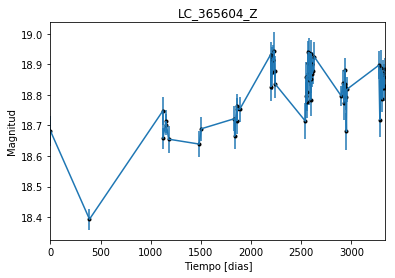

In [2]:
data = np.genfromtxt('LC_365604_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_365604_Z')
plt.savefig("LC_365604_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

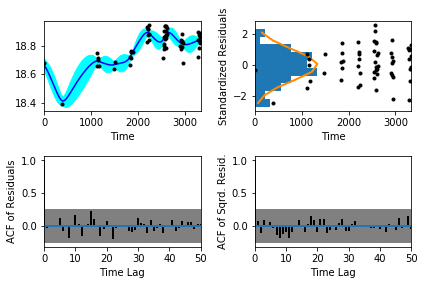

In [5]:
sample.assess_fit()

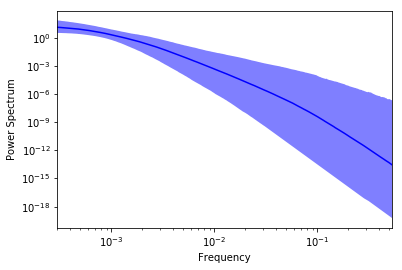

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

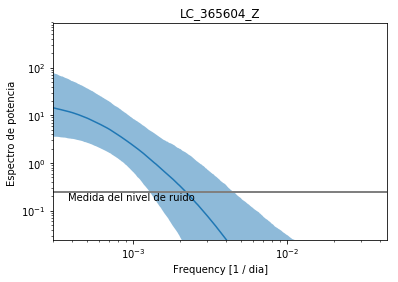

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_365604_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_365604_Z')

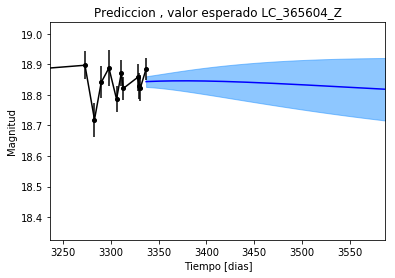

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_365604_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_365604_Z')

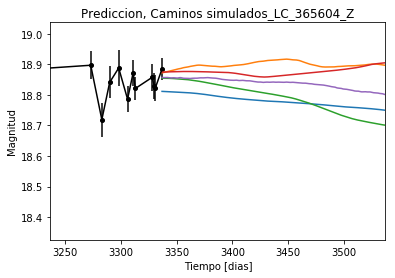

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_365604_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


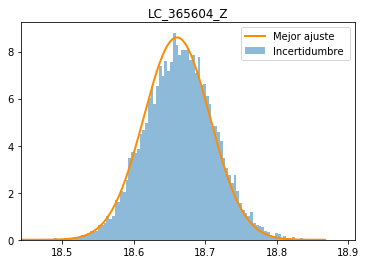

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_365604_Z')
plt.savefig("Mejor_ajuste_LC_365604_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_365604_Z')

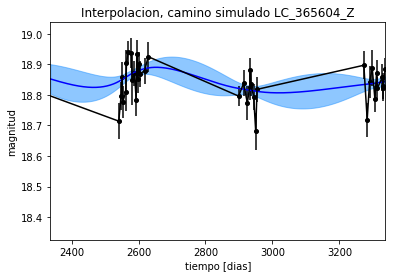

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_365604_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_365604_Z')

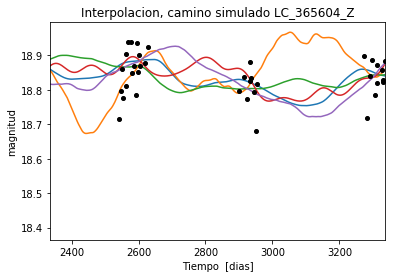

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_365604_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 596.478300332
Median: 0.0135050840274
Standard deviation: 0.214337485567
68% credibility interval: [ 0.00081682  0.21357652]
95% credibility interval: [  3.39363120e-04   8.64756456e-01]
99% credibility interval: [  3.04462354e-04   1.01594537e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 2806.56121763
Median: 0.000891101596079
Standard deviation: 0.06822504954
68% credibility interval: [ 0.00038311  0.01082971]
95% credibility interval: [ 0.00031048  0.13192809]
99% credibility interval: [  3.02091461e-04   5.79805297e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 386.84194348
Median: 0.0308527005767
Standard de

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2244.01247528
Median: 108.378964508
Standard deviation: 1.52277324306
68% credibility interval: [ 106.61313719  109.37614553]
95% credibility interval: [ 104.15855483  109.8913336 ]
99% credibility interval: [ 101.89673235  110.09716612]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 756.796364234
Median: 0.782743501945
Standard deviation: 2.23434461283
68% credibility interval: [ 0.07457484  3.91448888]
95% credibility interval: [ 0.01394725  7.25818131]
99% credibility interval: [  1.01991062e-02   1.13307782e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 505.732400993
Median: 0.163497847774
Standard deviation: 8.52291805339
68% credibility interval: [ 0.00596695  4.36634691]
95% credibility interval: [  2.3

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 13155.9372618
Median: 4.38475454611e-46
Standard deviation: 1.9389899102e+138
68% credibility interval: [  1.60877830e-89   1.07346972e-11]
95% credibility interval: [  1.13474890e-122   1.45367631e+067]
99% credibility interval: [  5.13702949e-139   3.76457610e+103]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2394.19344132
Median: 18.7273188689
Standard deviation: 0.0921217559254
68% credibility interval: [ 18.65309443  18.800036  ]
95% credibility interval: [ 18.5387618   18.91574404]
99% credibility interval: [ 18.43901934  19.03295786]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 318.772316235
Median: 0.0
Standard deviation: 0.21601722812
68% credibility interval: [ 0.          0.13956971]
95% credibility interval: [ 0.          0.84847891]
99% credibility interval: [ 0.          1.02788315]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 318.772316235
Median: 0.0
Standard deviation: 0.21601722812
68% credibility interval: [ 0.          0.13956971]
95% credibility interval: [ 0.          0.84847891]
99% credibility interval: [ 0.          1.02788315]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1623.80129215
Median: 0.0
Standard deviation: 0.00022350674861
68% credibility interval: [ 0.  0

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2244.01247528
Median: 108.378964508
Standard deviation: 1.52277324306
68% credibility interval: [ 106.61313719  109.37614553]
95% credibility interval: [ 104.15855483  109.8913336 ]
99% credibility interval: [ 101.89673235  110.09716612]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2089.65315442
Median: 0.0252934771338
Standard deviation: 0.0298445749903
68% credibility interval: [ 0.0144095   0.05002729]
95% credibility interval: [ 0.00910249  0.11024918]
99% credibility interval: [ 0.00713091  0.19009781]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 3010.19484341
Median: 1.07226458657
Standard deviation: 0.1599299831
68% credibility interval: [ 0.92794016  1.24548885]
95% credibility interval: [ 0.81359614  1.42911285]
99% credibility interval: [ 0.75418396  1.57833836]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 743.93627797
Median: 1.90329929062e-05
Standard deviation: 0.061661015316
68% credibility interval: [  3.34757256e-07   8.62713419e-04]
95% credibility interval: [  1.96114448e-73   4.04298744e-02]
99% credibility interval: [  1.57733097e-108   3.41634347e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 596.478300332
Median: (-0.0848549455334-2.10294404677j)
Standard deviation: 1.91203017918
68% credibility interval: [-1.34194084 -5.86273140e+00j -0.00513222 -2.95833664e-03j]
95% credibility interval: [ -5.43342506e+00+0.j          -2.13228137e-03-0.00507126j]
99% credibility interval: [ -6.38337301e+00+0.j          -1.91299339e-03-0.00234472j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 2806.56121763
Median: (-0.00559895645569+0.00206067671315j)
Standard deviation: 1.42336130041
68% credibility interval: [-0.06804505+4.44995824j -0.00240716+0.j        ]
95% credibility interval: [-0.82892866+5.67313265j -0.00195080+0.j        ]
99% credibility interval: [ -3.64302412e+00 +2.67901879e+00j  -1.89809663e-03 +8.90171